In [ ]:
import pandas as pd
import numpy as np
import glob as glob
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

In [ ]:
#path = "/gdrive/My Drive/Full Dataset/train test val split"
path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\FLNC disease classification\train test val split"
train = pd.read_csv(os.path.join(path, 'train_soft_summary.csv')).sort_index()
test = pd.read_csv(os.path.join(path, 'test_soft_summary.csv')).sort_index()

In [ ]:
train


,label,index,num peaks,bpm,RMSSD,mean RR interval,mean amplitude,mean raw amplitude,mean auc,mean tau,...,std auc,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90,mean peak_index,std peak_index
0,FLNC,E10,22.0,24.902182,2.412744,2.409427,0.379955,170.453204,0.192724,0.392576,...,0.006925,0.038940,0.022376,0.049983,0.034995,0.054219,0.014443,0.060007,186.090909,102.357408
1,FLNC,E18,30.0,32.610000,1.842128,1.839926,0.701701,336.931755,0.324855,0.319976,...,0.013598,0.037345,0.016772,0.017559,0.031268,0.047556,0.012328,0.051829,195.500000,106.522055
2,FLNC,F19,28.0,30.448530,1.972174,1.970538,0.530693,260.998887,0.235301,0.359072,...,0.013232,0.048422,0.026285,0.057454,0.041147,0.063566,0.056871,0.066242,191.250000,105.718573
3,GAA,F15,25.0,27.222261,2.207548,2.204079,0.214686,141.948385,0.091943,0.316350,...,0.005760,0.053257,0.046240,0.051443,0.050249,0.079474,0.055623,0.093689,193.680000,106.315066
4,GAA,D21,31.0,32.976404,1.820660,1.819483,0.216511,104.407278,0.080449,0.290076,...,0.007543,0.041101,0.029275,0.045826,0.044516,0.121819,0.039810,0.122233,191.645161,107.937806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,FLNC,M3,21.0,23.223739,2.585508,2.583563,0.478212,224.522176,0.233970,0.396700,...,0.014392,0.038074,0.018529,0.050439,0.039576,0.067121,0.047054,0.072556,192.523810,104.835881
448,FLNC,D8,22.0,24.241062,2.477980,2.475139,0.454084,248.073807,0.205015,0.329797,...,0.006670,0.054253,0.020500,0.058051,0.048774,0.063261,0.039963,0.072134,188.454545,105.064482
449,GAA,F7,27.0,28.741017,2.089374,2.087609,0.262608,122.538527,0.125601,0.345516,...,0.008235,0.047286,0.034521,0.062622,0.043584,0.090072,0.062777,0.083587,189.629630,107.956953
450,FLNC,N16,20.0,22.530545,2.664078,2.663051,0.615169,293.581896,0.306283,0.392366,...,0.015129,0.041392,0.017425,0.049973,0.039076,0.054430,0.027265,0.061397,186.350000,102.682072


## Splitting Data

We gather all indices, split the dataset, then match them back to dataframe.

In [ ]:
pd.concat([train.loc[:,"num peaks":],val.loc[:,"num peaks":]])

,num peaks,bpm,RMSSD,mean RR interval,mean amplitude,mean raw amplitude,mean auc,mean tau,mean fwhm,mean contract50,...,std auc,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90,mean peak_index,std peak_index
0,22.0,24.902182,2.412744,2.409427,0.379955,170.453204,0.192724,0.392576,0.466674,0.174306,...,0.006925,0.038940,0.022376,0.049983,0.034995,0.054219,0.014443,0.060007,186.090909,102.357408
1,30.0,32.610000,1.842128,1.839926,0.701701,336.931755,0.324855,0.319976,0.461819,0.212075,...,0.013598,0.037345,0.016772,0.017559,0.031268,0.047556,0.012328,0.051829,195.500000,106.522055
2,28.0,30.448530,1.972174,1.970538,0.530693,260.998887,0.235301,0.359072,0.417139,0.145294,...,0.013232,0.048422,0.026285,0.057454,0.041147,0.063566,0.056871,0.066242,191.250000,105.718573
3,25.0,27.222261,2.207548,2.204079,0.214686,141.948385,0.091943,0.316350,0.404790,0.160208,...,0.005760,0.053257,0.046240,0.051443,0.050249,0.079474,0.055623,0.093689,193.680000,106.315066
4,31.0,32.976404,1.820660,1.819483,0.216511,104.407278,0.080449,0.290076,0.352534,0.135256,...,0.007543,0.041101,0.029275,0.045826,0.044516,0.121819,0.039810,0.122233,191.645161,107.937806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,26.0,28.689150,2.093576,2.091383,0.221498,114.047449,0.102724,0.316012,0.434915,0.186376,...,0.006654,0.059793,0.022717,0.057514,0.055468,0.098308,0.078434,0.106172,191.153846,104.069089
94,25.0,26.530169,2.266876,2.261576,0.332851,188.512624,0.172763,0.388909,0.504493,0.188303,...,0.008533,0.041193,0.040017,0.055850,0.045128,0.045286,0.043887,0.052777,189.400000,107.122593
95,24.0,26.471647,2.269261,2.266576,0.423326,181.592418,0.178445,0.362475,0.397891,0.115796,...,0.008517,0.042582,0.021466,0.035149,0.037907,0.064379,0.062380,0.074738,193.000000,103.833479
96,26.0,27.557746,2.238157,2.177246,0.101063,52.808440,0.083093,0.424290,0.788615,0.430162,...,0.027275,0.144265,0.098948,0.148998,0.142397,0.647846,0.452864,0.429335,188.769231,110.743779


In [ ]:
X_drug_train = train.loc[:,"num peaks":]
X_drug_test = test.loc[:,"num peaks":"std relax90"]

In [ ]:
y_drug_train = train['label']
y_drug_test = test['label']

In [ ]:
y_drug_train.head()

0    FLNC
1    FLNC
2    FLNC
3     GAA
4     GAA
Name: label, dtype: object

We then extract X and y using the same split for the baseline data

In [ ]:
scaler = MinMaxScaler()
X_train_drug_only_scaled = pd.DataFrame(scaler.fit_transform(X_drug_train))
X_test_drug_only_scaled = pd.DataFrame(scaler.transform(X_drug_test))

In [ ]:
X_drug_train.head()

,num peaks,bpm,RMSSD,mean RR interval,mean amplitude,mean raw amplitude,mean auc,mean tau,mean fwhm,mean contract50,...,std amplitude,std raw amplitude,std auc,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90
0,22.0,24.902182,2.412744,2.409427,0.379955,170.453204,0.192724,0.392576,0.466674,0.174306,...,0.013390,6.006846,0.006925,0.038940,0.022376,0.049983,0.034995,0.054219,0.014443,0.060007
1,30.0,32.610000,1.842128,1.839926,0.701701,336.931755,0.324855,0.319976,0.461819,0.212075,...,0.014544,6.983671,0.013598,0.037345,0.016772,0.017559,0.031268,0.047556,0.012328,0.051829
2,28.0,30.448530,1.972174,1.970538,0.530693,260.998887,0.235301,0.359072,0.417139,0.145294,...,0.018264,8.982534,0.013232,0.048422,0.026285,0.057454,0.041147,0.063566,0.056871,0.066242
3,25.0,27.222261,2.207548,2.204079,0.214686,141.948385,0.091943,0.316350,0.404790,0.160208,...,0.017107,11.311174,0.005760,0.053257,0.046240,0.051443,0.050249,0.079474,0.055623,0.093689
4,31.0,32.976404,1.820660,1.819483,0.216511,104.407278,0.080449,0.290076,0.352534,0.135256,...,0.019051,9.187044,0.007543,0.041101,0.029275,0.045826,0.044516,0.121819,0.039810,0.122233


# Export function

In [ ]:
def export_evaluate(y_true, y_pred, export):
    cfn_matrix_sample = confusion_matrix(y_true, y_pred)
    classes = ['FLNC', 'GAA']

    os.makedirs(export, exist_ok=True)
    cfn_matrix_sample_frame = pd.DataFrame(cfn_matrix_sample, index=np.core.defchararray.add("True ",classes), columns=np.core.defchararray.add("Pred ",classes)).to_csv(os.path.join(export, "sample_confusion_matrix.csv"))
    pd.DataFrame(classification_report(y_true, y_pred, target_names=classes, output_dict=True)).T.to_csv(os.path.join(export, "sample_clsf_summary.csv"))
    wrong_index = pd.DataFrame()
    wrong_index['true'] = y_true
    wrong_index['pred'] = y_pred
    wrong_index['correct'] = np.array(y_true) == np.array(y_pred)
    wrong_index.to_csv(os.path.join(export, "misclassified.csv"))

# Models

Now we have 4 variables:

    X_drug_train, X_drug_test, y_drug_train, y_drug_test
    
    

In [ ]:
X_drug_train.shape, X_drug_test.shape, y_drug_train.shape, y_drug_test.shape

((550, 25), (98, 25), (550,), (98,))

In [ ]:
y_drug_train.value_counts()

GAA     299
FLNC    251
Name: label, dtype: int64

In [ ]:
y_drug_test.value_counts()

GAA     53
FLNC    45
Name: label, dtype: int64

# KNN

In [ ]:
knn = KNeighborsClassifier()
k = np.arange(20)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_drug_only_scaled,y_drug_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}])

In [ ]:
knn_clf.best_params_

{'n_neighbors': 3}

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

# training
model_KNN.fit(X_train_drug_only_scaled,y_drug_train)

# prediction
predictions_KNN = model_KNN.predict(X_test_drug_only_scaled)

print(predictions_KNN)
# accuracy
print(accuracy_score(y_drug_test,predictions_KNN))

['FLNC' 'FLNC' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'FLNC' 'GAA'
 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC'
 'FLNC' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA' 'FLNC'
 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA' 'FLNC' 'FLNC' 'FLNC'
 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'GAA' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA'
 'GAA' 'FLNC' 'FLNC' 'GAA' 'GAA' 'FLNC' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA'
 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA'
 'FLNC' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC'
 'FLNC' 'FLNC' 'GAA' 'GAA' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC']
0.9489795918367347


In [ ]:
y_pred_train = model_KNN.predict(X_train_drug_only_scaled)
y_pred_test = model_KNN.predict(X_test_drug_only_scaled)

# metrics.confusion_matrix(y_drug_test, y_pred_test)
model_KNN.classes_

array(['FLNC', 'GAA'], dtype=object)

<AxesSubplot: title={'center': 'Model: KNN'}>

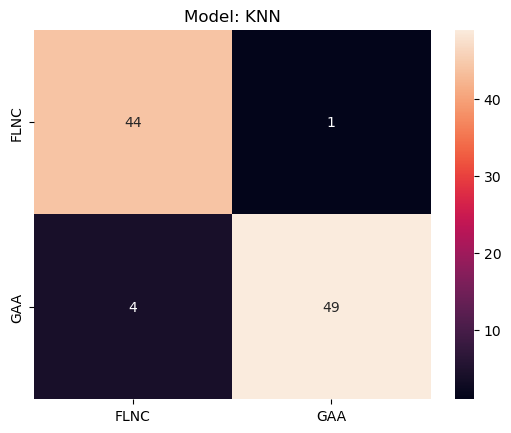

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_knn = confusion_matrix(y_drug_test,predictions_KNN)

x_axis_labels = model_KNN.classes_
y_axis_labels = model_KNN.classes_


plt.title('Model: KNN')
sns.heatmap(cfn_matrix_knn, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot: >

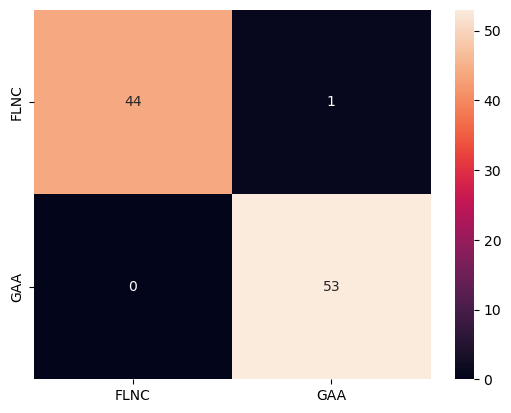

In [ ]:
sns.heatmap([[44,1],[0,53]], annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "KNN_"+ str(i))
    model_KNN = KNeighborsClassifier(n_neighbors=1)
    # training
    model_KNN.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions_KNN = model_KNN.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions_KNN,model_name)

# Lasso

In [ ]:
lasso = LogisticRegression(penalty='l1', solver="saga", max_iter=10000)
param_lasso = [{'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}]
lasso_clf1 = GridSearchCV(lasso, param_lasso, cv=5)
lasso_clf1.fit(X_train_drug_only_scaled,y_drug_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}])

In [ ]:
lasso_clf1.best_params_

{'C': 10}

In [ ]:
drug_classifier = LogisticRegression(penalty='l1', solver="saga", C=10, max_iter=10000)

drug_classifier.fit(X_train_drug_only_scaled, y_drug_train)

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')

In [ ]:

y_pred = drug_classifier.predict(X_test_drug_only_scaled)


print("Accuracy:",accuracy_score(y_drug_test, y_pred))

Accuracy: 0.9795918367346939


In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "LASSO_"+ str(i))
    model = LogisticRegression(penalty='l1', solver="saga", C=10, max_iter=10000)
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

# Ridge

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(solver='saga',max_iter=5000)

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100], 'penalty': ['l1']}

grid_search = GridSearchCV(lreg_clf, param_grid, cv=5, scoring= 'accuracy' ,return_train_score=True)
grid_search.fit(X_train_drug_only_scaled,y_drug_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_


{'C': 10, 'penalty': 'l1'}

In [ ]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='saga', C=10, penalty= 'l1', max_iter=5000)
lreg_clf.fit(X_train_drug_only_scaled, y_drug_train)

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [ ]:
y_pred_train = lreg_clf.predict(X_train_drug_only_scaled)
y_pred_test = lreg_clf.predict(X_test_drug_only_scaled)

lreg_train_accuracy_score = accuracy_score(y_drug_train, y_pred_train)
lreg_test_accuracy_score = accuracy_score(y_drug_test, y_pred_test)

print('Train Precision score: {}'
      .format(lreg_train_accuracy_score))
print('Test Precision score: {}'
      .format(lreg_test_accuracy_score))

Train Precision score: 1.0
Test Precision score: 0.9795918367346939


<AxesSubplot: title={'center': 'Model: Logistic regression'}>

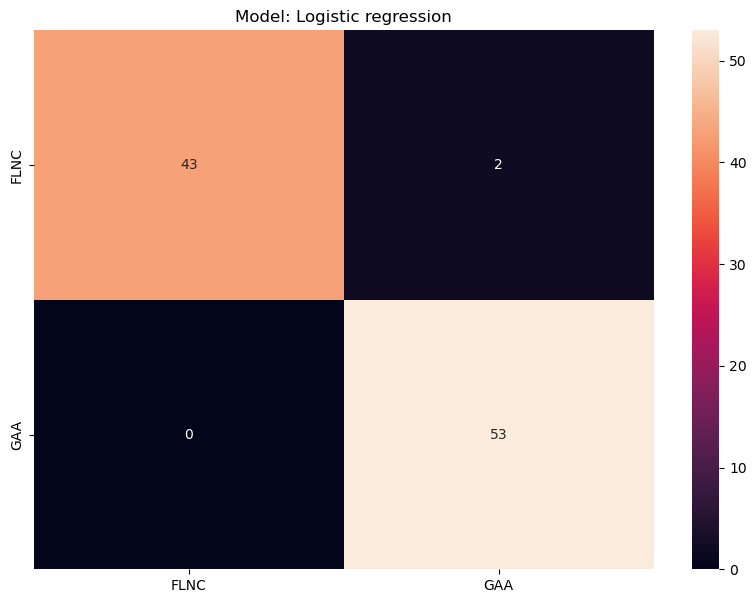

In [ ]:
predictions = lreg_clf.predict(X_test_drug_only_scaled)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_NB = confusion_matrix(y_drug_test,predictions)


plt.figure(figsize = (10,7))
plt.title('Model: Logistic regression')
sns.heatmap(cfn_matrix_NB, annot = True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "Ridge_"+ str(i))
    model = LogisticRegression(penalty='l1', solver="saga", C=10, max_iter=5000)
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

# Elastic Net

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(solver='saga',max_iter=5000)

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100], 'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 'penalty': ['elasticnet']}

grid_search = GridSearchCV(lreg_clf, param_grid, cv=5, scoring= 'accuracy' ,return_train_score=True)
grid_search.fit(X_train_drug_only_scaled,y_drug_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'penalty': ['elasticnet']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_


{'C': 100, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}

In [ ]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='saga', C=100, penalty= 'elasticnet', l1_ratio=0.6, max_iter=5000)
lreg_clf.fit(X_train_drug_only_scaled, y_drug_train)

LogisticRegression(C=100, l1_ratio=0.6, max_iter=5000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

In [ ]:
y_pred_train = lreg_clf.predict(X_train_drug_only_scaled)
y_pred_test = lreg_clf.predict(X_test_drug_only_scaled)

lreg_train_accuracy_score = accuracy_score(y_drug_train, y_pred_train)
lreg_test_accuracy_score = accuracy_score(y_drug_test, y_pred_test)

print('Train Precision score: {}'
      .format(lreg_train_accuracy_score))
print('Test Precision score: {}'
      .format(lreg_test_accuracy_score))

Train Precision score: 1.0
Test Precision score: 0.9795918367346939


<AxesSubplot: title={'center': 'Model: Logistic regression'}>

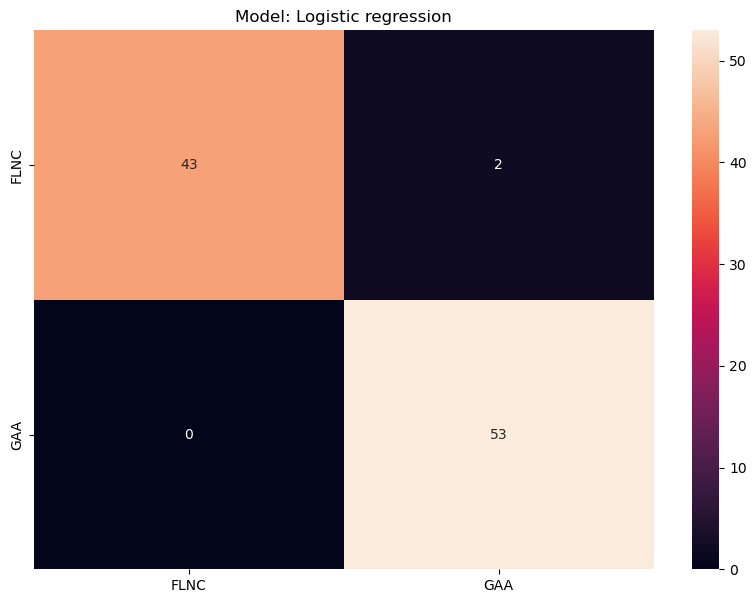

In [ ]:
predictions = lreg_clf.predict(X_test_drug_only_scaled)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_NB = confusion_matrix(y_drug_test,predictions)


plt.figure(figsize = (10,7))
plt.title('Model: Logistic regression')
sns.heatmap(cfn_matrix_NB, annot = True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "Elastic_Net_"+ str(i))
    model = LogisticRegression(multi_class='multinomial', solver='saga', C=100, penalty= 'elasticnet', l1_ratio=0.6, max_iter=5000)
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

# Naive Bayes

In [ ]:
model = GaussianNB()

# training
model.fit(X_train_drug_only_scaled,y_drug_train)

# prediction
predictions = model.predict(X_test_drug_only_scaled)

# accuracy
print(accuracy_score(y_drug_test,predictions))

0.8877551020408163


In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "Naive_Bayes_"+ str(i))
    model = GaussianNB()
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

# SVM

In [ ]:


%time
# defining parameter range
param_grid = {
              'C':[0.01, 0.02, 0.025, 0.1, 0.2, 0.5, 1, 2, 5, 10],
              'gamma':['scale', 'auto'],
              'kernel': ['linear'], #, 'poly', 'rbf'
              'decision_function_shape':['ovo', 'ovr']
              }

grid = GridSearchCV(SVC(cache_size=300), param_grid, refit = True, verbose = 4,n_jobs=-1,scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train_drug_only_scaled,y_drug_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(cache_size=300), n_jobs=-1,
             param_grid={'C': [0.01, 0.02, 0.025, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             scoring='accuracy', verbose=4)

In [ ]:
print(grid.best_params_)

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
#drug_classifier_final = SVC(kernel='poly', C=5, gamma = 'scale', decision_function_shape='ovo')
drug_classifier_final = SVC(kernel='linear', C=5, gamma = 'scale', decision_function_shape='ovo')

drug_classifier_final.fit(X_train_drug_only_scaled,y_drug_train)

SVC(C=5, decision_function_shape='ovo', kernel='linear')

In [ ]:
prediction = drug_classifier_final.predict(X_test_drug_only_scaled)

print("Accuracy:",metrics.accuracy_score(y_drug_test, prediction))
print(prediction)

Accuracy: 0.9897959183673469
['FLNC' 'FLNC' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'FLNC' 'GAA'
 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC'
 'FLNC' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA' 'FLNC'
 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA' 'FLNC' 'FLNC'
 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'GAA' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA'
 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA'
 'GAA' 'GAA' 'GAA' 'FLNC' 'FLNC' 'GAA' 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA'
 'FLNC' 'GAA' 'FLNC' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'GAA' 'FLNC'
 'FLNC' 'FLNC' 'GAA' 'GAA' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC' 'FLNC']


In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "SVM_"+ str(i))
    model = SVC(kernel='linear', C=5, gamma = 'scale', decision_function_shape='ovo')
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

In [ ]:
model.coef_

array([[ 0.95850077,  0.56832624,  0.29916021,  0.22587772, -4.57752477,
         2.46564519, -4.40766694, -3.47300011,  1.75653068,  0.94460117,
         1.77427565, -1.70339063,  6.16406863, -6.92443891,  2.31985509,
        -0.65944529,  4.33539893, -2.42313798, -0.74942318,  0.38992536,
        -0.80772727,  3.01337967,  0.21741258,  0.042401  ,  0.05133937]])

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

param_grid = {
            'criterion': ["gini", "entropy", "log_loss"],
            'max_depth': [5, 10, 20, 50, 100],
            'splitter': ['best', 'random'],
            'min_samples_split':[2,3,4,5,10,20,50],
            'max_features': ['sqrt', 'log2', None],
            }

grid_search_decision_tree = GridSearchCV(decision_tree, param_grid, cv = 5, return_train_score=True, verbose = 2, scoring = "accuracy", refit = True)
grid_search_decision_tree.fit(X_train_drug_only_scaled,y_drug_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_split=4, splitter=best; t

[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_split=4, splitter=random; tot

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=50, 

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2, splitter=

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=ra

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=10, spl

[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=r

[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=3, splitter=

[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=None, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples

[CV] END criterion=gini, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_features=None, min_samples_split=2, 

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_sp

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_

[CV] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_s

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_s

[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, m

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features

[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_s

[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_s

[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=None, min_s

[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max

[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=None, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_fe

[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, m

[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, m

[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=N

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=

[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_feature

[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_featur

[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=log2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max

[CV] END criterion=log_loss, max_depth=20, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, max_features=None, min_samples_split=50, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_featu

[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_feature

[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=None, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=50, max_features=

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth

[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50, 100],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4, 5, 10, 20, 50],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
print(grid_search_decision_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 3, 'splitter': 'random'}


In [ ]:
optimized_dt = DecisionTreeClassifier(criterion="gini",max_depth = 100, max_features = None, min_samples_split = 20, splitter = 'random')
optimized_dt.fit(X_train_drug_only_scaled,y_drug_train)

print('Train score: ', optimized_dt.score(X_train_drug_only_scaled,y_drug_train))
print('Test score: ', optimized_dt.score(X_test_drug_only_scaled, y_drug_test))

Train score:  0.9472727272727273
Test score:  0.9285714285714286


In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "Decision_tree_"+ str(i))
    model = DecisionTreeClassifier(criterion="gini",max_depth = 100, max_features = None, min_samples_split = 20, splitter = 'random')
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)

param_grid ={
          'max_depth': [5,10,15,20,25],
           'n_estimators':[100,200,300,400,500]}

grid_search = GridSearchCV(rf_clf, param_grid,cv=5, scoring='accuracy', n_jobs=-1,return_train_score=True)
grid_search.fit(X_train_drug_only_scaled,y_drug_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_clf.fit(X_train_drug_only_scaled, y_drug_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = rf_clf.predict(X_train_drug_only_scaled)
y_pred_test = rf_clf.predict(X_test_drug_only_scaled)

rf_train_accuracy_score = accuracy_score(y_drug_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_drug_test, y_pred_test)

print('Train Precision score: {}'
      .format(rf_train_accuracy_score))
print('Test Precision score: {}'
      .format(rf_test_accuracy_score))


Train Precision score: 1.0
Test Precision score: 0.9489795918367347


In [ ]:
for i in range(1,6):
    folder_path = r"I:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\disease classification\traditional ml models"
    model_name = os.path.join(folder_path, "Random_forest_"+ str(i))
    model = RandomForestClassifier(n_estimators=200, max_depth=10)
    # training
    model.fit(X_train_drug_only_scaled,y_drug_train)
    # prediction
    predictions = model.predict(X_test_drug_only_scaled)
    export_evaluate(y_drug_test,predictions,model_name)